In [1]:
# Import relevant libraries.
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
from dateutil.relativedelta import relativedelta
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ross\Documents\code\notebooks\assessment2\repd-january-2023.csv")
df.head()

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Appeal Refused,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref
0,N00053B,1,07/07/2009,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,NaN,NaN,03/09/2004,NaN,NaN,NaN,NaN,01/05/2006,01/05/2007,NaN
1,AA110,2,20/11/2017,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0730,3,04/06/2020,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,NaN,NaN,28/10/2015,NaN,NaN,NaN,28/10/2020,01/09/2016,20/12/2019,NaN
3,1106000,4,18/12/2003,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,NaN,NaN,05/05/1995,NaN,NaN,NaN,NaN,NaN,02/10/1998,NaN
4,2047000,5,29/09/2005,Agrigen,Nunn Mills Road Biomass Plant,Biomass (dedicated),NaN,NaN,8.8,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Drop private developers as agreed.

private_dev = df[(df['Operator (or Applicant)'] == 'Private Developer')].index
df.drop(private_dev, inplace=True)

In [4]:
# Calculate time to approve

# Dates are stored as objects (strings), so these should be converted to dates.
# Add column calculating difference in days between date of permission submitted
# and granted.

df['Planning Application Submitted']= pd.to_datetime(df['Planning Application Submitted'], dayfirst=True)
df['Planning Permission Granted']= pd.to_datetime(df['Planning Permission Granted'], dayfirst=True)

df['time_to_approve'] =  df['Planning Permission Granted'] - df['Planning Application Submitted']
df['time_to_approve'] = df['time_to_approve'] / np.timedelta64(1,'D')

In [5]:
# Calculate time taken for refusal
df['Planning Permission Refused']= pd.to_datetime(df['Planning Permission Refused'], dayfirst=True)
df['time_to_refuse'] =  df['Planning Permission Refused'] - df['Planning Application Submitted']
df['time_to_refuse'] = df['time_to_refuse'] / np.timedelta64(1,'D')


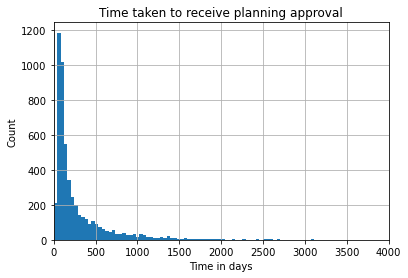

In [6]:
# Some time_to_approve values are false - these contain erroneous dates and should be excluded.

df_time = df[df.time_to_approve >= 0]

df_time.describe()

fig = df_time.hist(column='time_to_approve', bins=100)
plt.xlabel('Time in days')
plt.ylabel('Count')
plt.title('Time taken to receive planning approval')
plt.xlim(0, 4000)
plt.show()

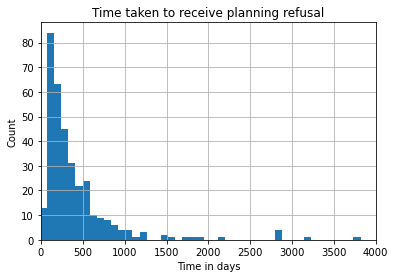

In [7]:

df_time.describe()

fig = df_time.hist(column='time_to_refuse', bins=100)
plt.xlabel('Time in days')
plt.ylabel('Count')
plt.title('Time taken to receive planning refusal')
plt.xlim(0, 4000)
plt.show()

<AxesSubplot:xlabel='time_to_approve', ylabel='Count'>

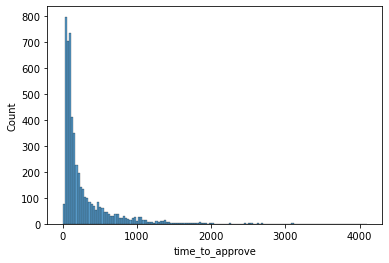

In [8]:
# Seaborn histplot
sns.histplot(data=df_time, x='time_to_approve')


<AxesSubplot:xlabel='time_to_refuse', ylabel='Count'>

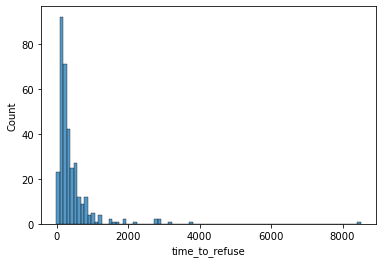

In [9]:
sns.histplot(data=df_time, x='time_to_refuse')

In [10]:
# Summary stats for df_time
df_time.describe()


,Ref ID,Installed Capacity (MWelec),RO Banding (ROC/MWh),CfD Capacity (MW),Turbine Capacity (MW),No. of Turbines,Height of Turbines (m),Y-coordinate,Heat Network Ref,time_to_approve,time_to_refuse
count,5205.000000,4918.000000,188.000000,133.000000,1092.000000,1101.000000,326.000000,5.197000e+03,4.000000,5205.000000,341.000000
mean,5483.945629,21.216470,1.378191,190.553083,2.412244,12.037239,125.682147,3.727359e+05,9288.000000,284.124688,427.029326
std,3618.858457,94.845759,0.275764,431.527107,1.594233,23.968227,45.646196,2.271312e+05,1.632993,379.940136,649.507505
min,1.000000,0.150000,0.000000,0.640000,0.050000,1.000000,30.000000,2.122600e+04,9286.000000,0.000000,-14.000000
25%,2184.000000,1.600000,1.400000,20.000000,1.600000,2.000000,100.000000,1.897300e+05,9287.500000,77.000000,144.000000
50%,5227.000000,5.000000,1.400000,42.000000,2.300000,6.000000,125.000000,3.204640e+05,9288.000000,137.000000,250.000000
75%,8045.000000,16.000000,1.400000,81.600000,3.000000,12.000000,149.900000,5.309770e+05,9288.500000,329.000000,488.000000
max,12899.000000,2400.000000,2.000000,2852.000000,15.000000,400.000000,350.000000,1.198506e+06,9290.000000,4097.000000,8504.000000


In [11]:
# Mean is not a good measure of central tendency for non-parametric data
mode = stats.mode(df_time['time_to_approve'])
median_approve = np.nanmedian(df_time['time_to_approve'])


In [12]:
median_approve

137.0

In [13]:

median_refuse = np.nanmedian(df_time['time_to_refuse'])
median_refuse

250.0

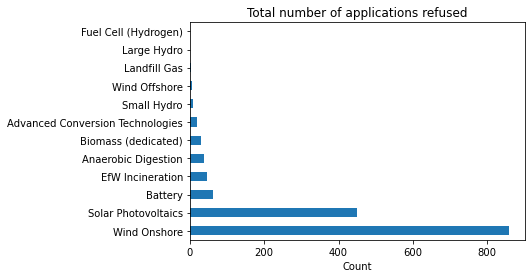

In [14]:
# Create df for only Planning Permission Refused.

df_plan_ref = df[df['Planning Permission Refused'].notnull()]
df_plan_ref

fig = pd.value_counts(df_plan_ref['Technology Type']).plot.barh()
plt.xlabel('Count')
plt.title('Total number of applications refused')
plt.show()

In [15]:
# Planning permission normalised against total number of applications.

count_refusals = pd.value_counts(df_plan_ref['Technology Type'])
count_refusals
count_total = pd.value_counts(df['Technology Type'])
count_total

normalised = count_refusals/count_total
normalised.dropna(inplace=True)
normalised

Advanced Conversion Technologies    0.139535
Anaerobic Digestion                 0.123779
Battery                             0.062757
Biomass (dedicated)                 0.124464
EfW Incineration                    0.231156
Fuel Cell (Hydrogen)                1.000000
Landfill Gas                        0.006849
Large Hydro                         0.033333
Small Hydro                         0.059259
Solar Photovoltaics                 0.127083
Wind Offshore                       0.060976
Wind Onshore                        0.398144
Name: Technology Type, dtype: float64

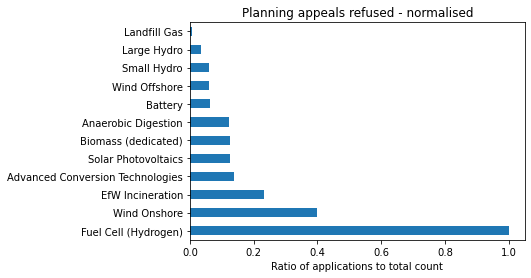

In [22]:
snormalised = normalised.sort_values(ascending=False)

fig = snormalised.plot.barh()
plt.xlabel('Ratio of applications to total count')
plt.title('Planning appeals refused - normalised')
plt.show()

<AxesSubplot:title={'center':'Sec of State Refusal'}>

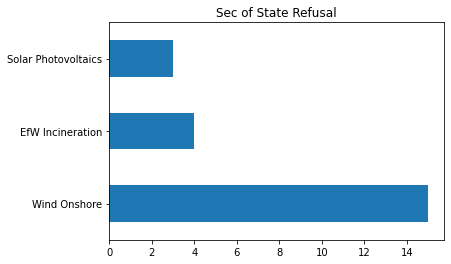

In [17]:
# Create df for only Sec of State refusals.

df_sec_ref = df[df['Secretary of State - Refusal'].notnull()]
df_sec_ref

pd.value_counts(df_sec_ref['Technology Type']).plot.barh(title='Sec of State Refusal')


In [18]:
# Top 15 local authorities for granting planning permission.

grant_counties = df_time[df_time['Planning Permission Granted'].notna()]

counties = pd.value_counts(grant_counties['Planning Authority'])

print(counties.head(n=15))

Northern Ireland Planning Service                      174
Scottish Government (S36)                              167
Cornwall Council                                       143
Highland Council                                       120
Aberdeenshire Council                                  104
Wiltshire Council                                       79
DECC (S36)                                              62
East Riding of Yorkshire Council                        57
Fife Council                                            54
Dumfries and Galloway Council                           49
Durham County Council                                   49
Perth and Kinross Council                               44
South Lanarkshire Council                               42
Shropshire Council                                      40
The Planning Inspectorate - National Infrastructure     38
Name: Planning Authority, dtype: int64


In [19]:
normalised

Advanced Conversion Technologies    0.139535
Anaerobic Digestion                 0.123779
Battery                             0.062757
Biomass (dedicated)                 0.124464
EfW Incineration                    0.231156
Fuel Cell (Hydrogen)                1.000000
Landfill Gas                        0.006849
Large Hydro                         0.033333
Small Hydro                         0.059259
Solar Photovoltaics                 0.127083
Wind Offshore                       0.060976
Wind Onshore                        0.398144
Name: Technology Type, dtype: float64